In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    return x * (1 - x)

In [74]:
def mse(y, output):
    return np.mean((y - output) ** 2)

In [75]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize the weights and biases randomly
        # W1: weights for the input layer to the hidden layer
        # b1: biases for the hidden layer
        # W2: weights for the hidden layer to the output layer
        # b2: biases for the output layer
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.random.randn(hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.random.randn(output_size)

    def forward(self, X):
        # Forward propagation
        # Compute the weighted sum of inputs and biases for the hidden layer
        self.z1 = np.dot(X, self.W1) + self.b1
        # Apply the sigmoid activation function to the weighted sum of the hidden layer
        self.a1 = sigmoid(self.z1)
        # Compute the weighted sum of hidden layer outputs and biases for the output layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        # Apply the sigmoid activation function to the weighted sum of the output layer
        output = sigmoid(self.z2)
        return output

    def backward(self, X, y, output):
        # Backpropagation
        # Compute the error between the predicted output and the true labels
        output_error = y - output
        # Compute the delta for the output layer using the derivative of the sigmoid function
        output_delta = output_error * sigmoid_derivative(output)

        # Compute the error for the hidden layer by propagating the output delta backwards
        hidden_error = np.dot(output_delta, self.W2.T)
        # Compute the delta for the hidden layer using the derivative of the sigmoid function
        hidden_delta = hidden_error * sigmoid_derivative(self.a1)

        # Compute gradients for weights and biases
        # Compute the gradient for W2 using the outer product of the hidden layer outputs and output delta
        self.W2_gradient = np.dot(self.a1.T, output_delta)
        # Compute the gradient for b2 by summing the output delta along the rows
        self.b2_gradient = np.sum(output_delta, axis=0)
        # Compute the gradient for W1 using the outer product of the input X and hidden delta
        self.W1_gradient = np.dot(X.T, hidden_delta)
        # Compute the gradient for b1 by summing the hidden delta along the rows
        self.b1_gradient = np.sum(hidden_delta, axis=0)

    def update_weights(self, learning_rate):
        # Stochastic Gradient Descent (SGD) update
        # Update the weights and biases using the computed gradients and the learning rate
        self.W2 += learning_rate * self.W2_gradient
        self.b2 += learning_rate * self.b2_gradient
        self.W1 += learning_rate * self.W1_gradient
        self.b1 += learning_rate * self.b1_gradient

    def train(self, X, y, epochs, learning_rate):
        losses = []
        for epoch in range(epochs):
            # Forward propagation
            output = self.forward(X)
            # Compute the mean squared error loss
            loss = mse(y, output)
            losses.append(loss)
            # Backpropagation
            self.backward(X, y, output)
            # Update weights and biases using SGD
            self.update_weights(learning_rate)
            # Print the loss every 1000 epochs
            if (epoch + 1) % 1000 == 0:
                print(f"Epoch: {epoch + 1}, Loss: {loss}")
        return losses

    def predict(self, X):
        # Make predictions using the trained network
        return self.forward(X)

In [76]:
# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Create and train the neural network
input_size = 2
hidden_size = 2
output_size = 1
epochs = 10000
learning_rate = 0.1

nn = NeuralNetwork(input_size, hidden_size, output_size)
losses = nn.train(X, y, epochs, learning_rate)

Epoch: 1000, Loss: 0.20334497782595554
Epoch: 2000, Loss: 0.17915482778728864
Epoch: 3000, Loss: 0.16897668251384718
Epoch: 4000, Loss: 0.15012400373484547
Epoch: 5000, Loss: 0.09496726441032977
Epoch: 6000, Loss: 0.024658791433405016
Epoch: 7000, Loss: 0.010992809332623005
Epoch: 8000, Loss: 0.006685065418208914
Epoch: 9000, Loss: 0.004707859020542392
Epoch: 10000, Loss: 0.003598865911126741


In [77]:
predictions = nn.predict(X)
print("Predictions:")
for i in range(len(X)):
    print(f"Input: {X[i]}, Prediction: {predictions[i]}")

Predictions:
Input: [0 0], Prediction: [0.04843577]
Input: [0 1], Prediction: [0.94290537]
Input: [1 0], Prediction: [0.94350511]
Input: [1 1], Prediction: [0.07479657]


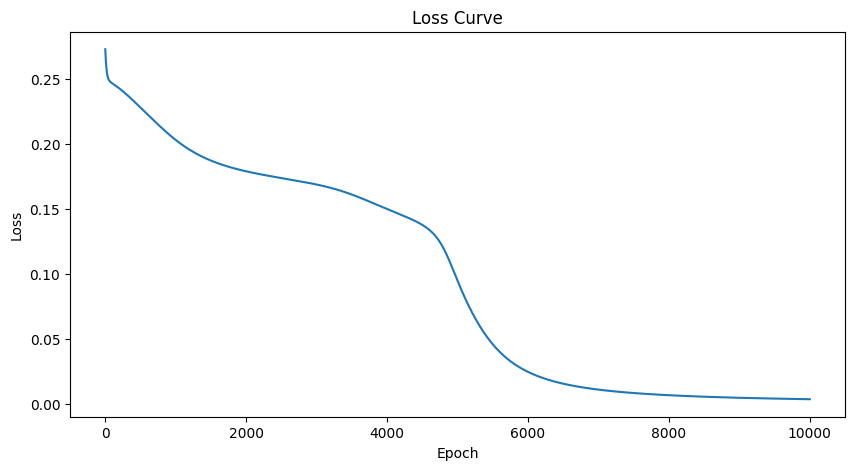

In [78]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(epochs), y=losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()